In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import scale



In [40]:
german=pd.read_csv('C:/Users/Kshitij/Desktop/german.txt',sep=" ")
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
         'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
         'other_debtors', 'residing_since', 'property', 'age',
         'inst_plans', 'housing', 'num_credits',
         'job', 'dependents', 'telephone', 'foreign_worker', 'good/bad']
german.columns = columns
german.head(5)

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,good/bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [41]:
german["status"]=np.where(german['good/bad'] == 1, "Good", "Bad")
german.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,good/bad,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,2,Bad


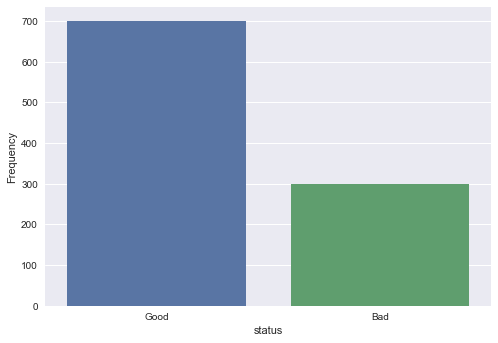

In [42]:
sns.set(style="darkgrid")
sns.countplot(x="status", data=german)
plt.ylabel( "Frequency")
sns.plt.show()

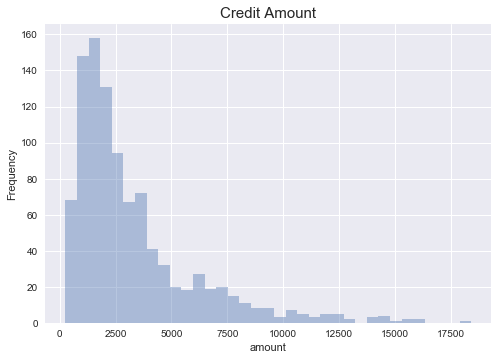

In [43]:
sns.distplot( german.amount, kde = False )
plt.title( "Credit Amount", fontsize = 15)
plt.ylabel( "Frequency")
sns.plt.show()

C:\Users\Kshitij\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


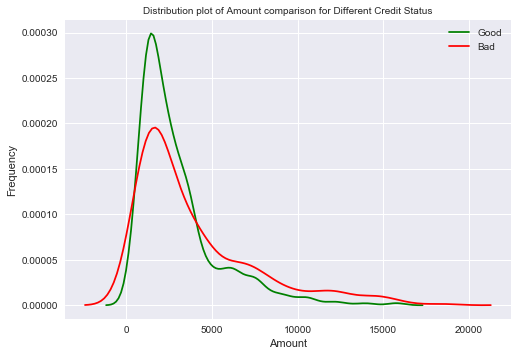

In [44]:
sns.kdeplot( german[german['good/bad'] == 1].amount, color = 'g', label="Good")
sns.kdeplot( german[german['good/bad'] == 2].amount, color = 'r', label="Bad")
plt.title( "Distribution plot of Amount comparison for Different Credit Status", fontsize = 10 )
plt.ylabel( "Frequency")
plt.xlabel("Amount")
plt.legend();
sns.plt.show()

C:\Users\Kshitij\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


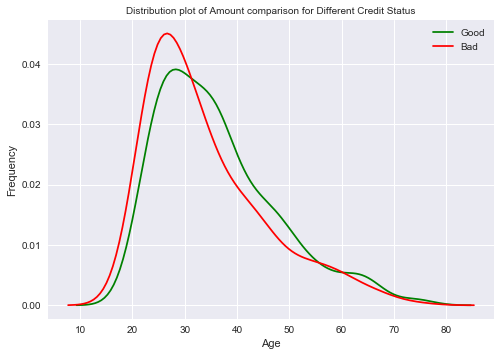

In [45]:

sns.kdeplot( german[german['good/bad'] == 1].age, color = 'g', label="Good")
sns.kdeplot( german[german['good/bad'] == 2].age, color = 'r', label="Bad")
plt.title( "Distribution plot of Amount comparison for Different Credit Status", fontsize = 10 )
plt.ylabel( "Frequency")
plt.xlabel("Age")
plt.legend();
sns.plt.show()

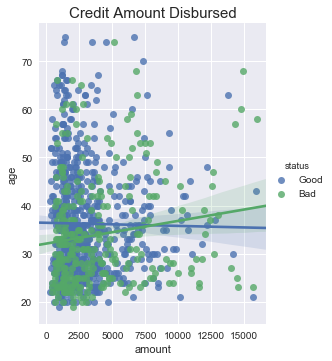

In [46]:
#Checking if higher amount leads to high defaulter rate
sns.set(style="darkgrid")
sns.pairplot(german, x_vars=["amount"], y_vars=["age"],
             hue="status", size=5, aspect=.8, kind="reg")
plt.title( "Credit Amount Disbursed", fontsize = 15)
sns.plt.show()

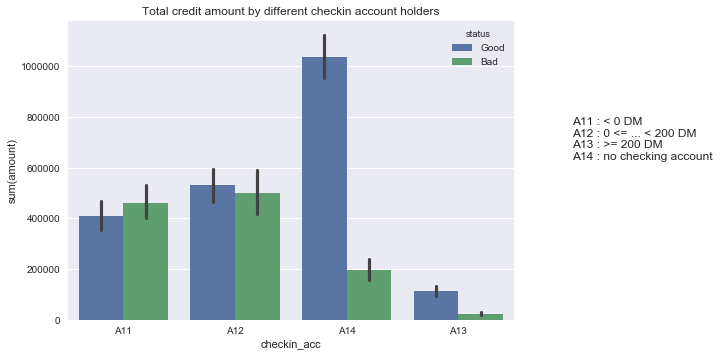

In [47]:
sns.barplot( x = 'checkin_acc',y = 'amount',hue = 'status',data = german,estimator = sum )
plt.title( "Total credit amount by different checkin account holders")
plt.figtext(1, 0.5,"""A11 : < 0 DM \n A12 : 0 <= ... < 200 DM \n A13 : >= 200 DM \n A14 : no checking account 
""", wrap=True, horizontalalignment='left', fontsize=12)
sns.plt.show()

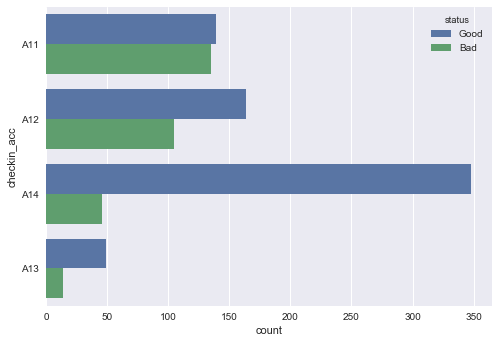

In [48]:
#Customers having no checkin account seems to have lesser chance
#of making a default where as customers having checkin accoun without
#any balance have higher chance of making a default.
sns.countplot( y = 'checkin_acc', hue = 'status', data = german )
sns.plt.show()

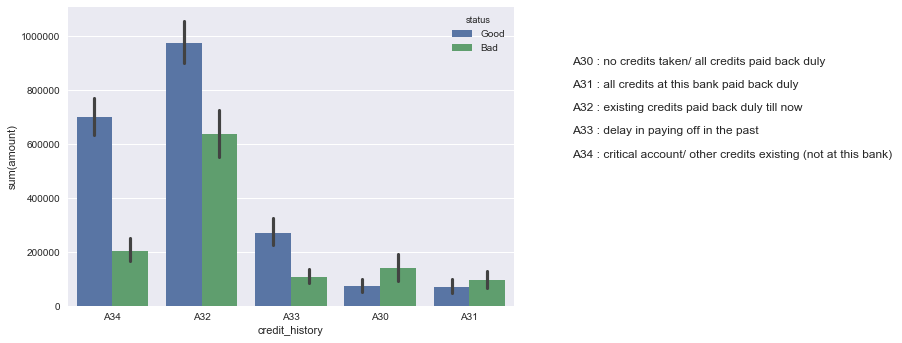

In [49]:
# Impact of credit history on bad credits

figure_text = """A30 : no credits taken/ all credits paid back duly \n
A31 : all credits at this bank paid back duly \n
A32 : existing credits paid back duly till now \n
A33 : delay in paying off in the past \n
A34 : critical account/ other credits existing (not at this bank) """
sns.barplot( x = 'credit_history', y = 'amount', hue = 'status', data = german, estimator = sum )
plt.figtext(1, 0.5,figure_text, wrap=True, horizontalalignment='left', fontsize=12)
sns.plt.show()

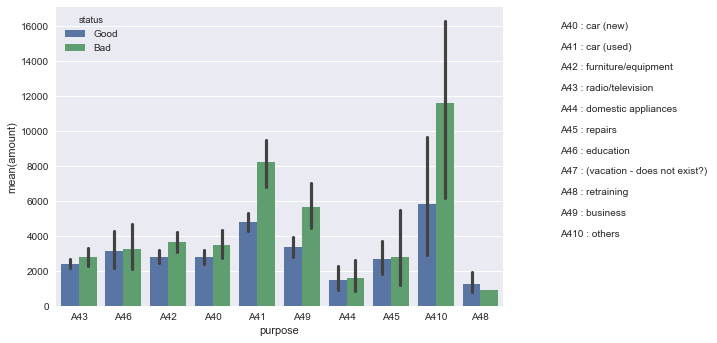

In [50]:
# Analyzing impact of credit purpose on bad credit
purpose_text = '''
A40 : car (new) \n
A41 : car (used) \n
A42 : furniture/equipment \n
A43 : radio/television \n
A44 : domestic appliances \n 
A45 : repairs \n
A46 : education\n
A47 : (vacation - does not exist?) \n
A48 : retraining \n
A49 : business \n
A410 : others '''
sns.barplot( x = 'purpose', y = 'amount', hue = 'status', data = german )
plt.figtext(1, 0.3,purpose_text, wrap=True, horizontalalignment='left', fontsize=10)
sns.plt.show()

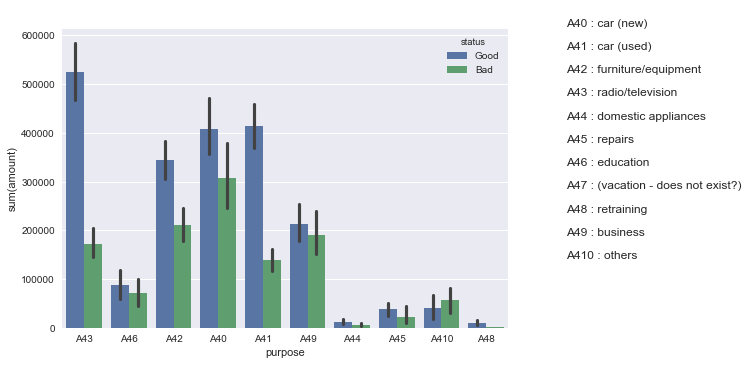

In [51]:
sns.barplot( x = 'purpose', y = 'amount', hue = 'status', data = german, estimator = sum )
plt.figtext(1, 0.3,purpose_text, wrap=True, horizontalalignment='left', fontsize=12)
sns.plt.show()

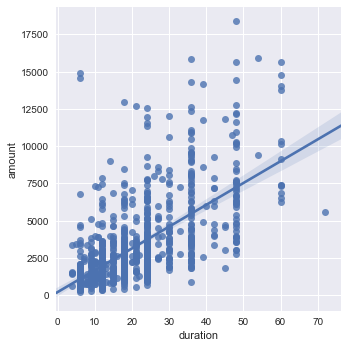

In [52]:
# Relationship between Credit amount and Time
sns.lmplot( x = 'duration', y = 'amount',fit_reg = True, data = german )
sns.plt.show()

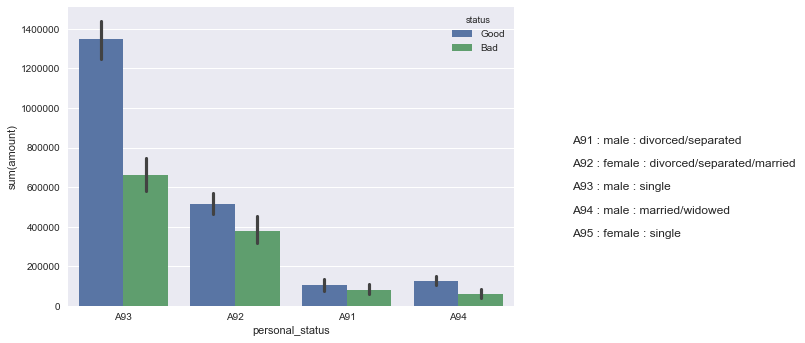

In [53]:
# Impact of personal status on bad credit - Comment on no data present for A95
personal_text = '''A91 : male : divorced/separated \n
A92 : female : divorced/separated/married \n
A93 : male : single \n
A94 : male : married/widowed \n
A95 : female : single'''
sns.barplot( x = 'personal_status', y = 'amount', hue = 'status', data = german, estimator = sum )
plt.figtext(1, 0.3,personal_text, wrap=True, horizontalalignment='left', fontsize=12)
sns.plt.show()

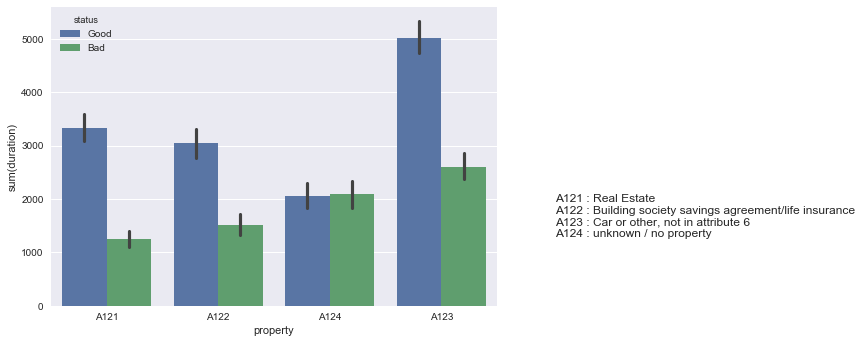

In [54]:
property_text = '''A121 : Real Estate
A122 : Building society savings agreement/life insurance
A123 : Car or other, not in attribute 6
A124 : unknown / no property'''
sns.set(style="darkgrid")
sns.barplot( x = 'property', y = 'duration', hue = 'status', data = german,estimator=sum )
plt.figtext(1, 0.3,property_text, wrap=True, horizontalalignment='left', fontsize=12)
sns.plt.show()

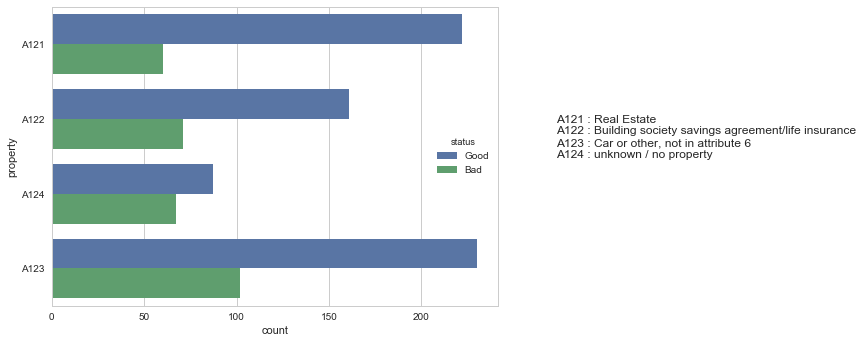

In [55]:
#Customers having Real Estate property seems to have lesser chance
#of making a default where as customers having a car have higher chance of making a default.
sns.set(style="whitegrid")
sns.countplot( y = 'property', hue = 'status', data = german )
plt.figtext(1, 0.5,property_text, wrap=True, horizontalalignment='left', fontsize=12)
sns.plt.show()

Droping Status column and Updating Values of Good credit and Bad credit for use in Alogorithms ahead. Now the Updated values would be - Good=0, Bad=1.
We also convert the Categorical variables into Dummy variables

In [56]:
german=german.drop("status",1)
german.head(5)
german['good/bad'] = german['good/bad']-1
#german['good/bad'] = german['good/bad'].astype('category')

df = pd.get_dummies(german, prefix=['checkin_acc', 'credit_history', 'purpose','saving_acc', 'present_emp_since', 'personal_status',
         'other_debtors', 'property','inst_plans', 'housing','job', 'telephone', 'foreign_worker'], columns=['checkin_acc', 'credit_history', 'purpose','saving_acc', 'present_emp_since', 'personal_status',
         'other_debtors', 'property','inst_plans', 'housing','job', 'telephone', 'foreign_worker'])
df.head(5)

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,good/bad,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


We will separate the Target variable from independent variables and then proceed with standardizing the dataset by performing the scaling function. Then we will divide the dataset into train and test. We will also check for any correlation in the model so as to further optimize its performance. 

In [57]:
X=df.drop('good/bad',1)
Y=df['good/bad']

#Standardizing the dataset
names = list(X.columns.values)
num=names[:5]
cat=names[5:]


#Performing the Scaling funcion
X_scale=pd.DataFrame(scale(X[num]))
X_scale.columns = num
X=pd.concat((X_scale,X[cat]), axis=1)

#Dividing the Dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0) 
corr = X.corr()
corr



,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,0.089452,-0.076455,...,-0.075169,0.189117,-0.044043,-1.812030e-01,0.055010,0.147515,-0.164718,0.164718,0.138196,-0.138196
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,0.119612,-0.100510,...,-0.117497,0.201643,-0.027969,-1.617570e-01,-0.092636,0.319715,-0.276995,0.276995,0.050050,-0.050050
inst_rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.051906,-0.041591,...,0.049922,0.040098,-0.087834,-5.723714e-02,0.042623,0.042805,-0.014413,0.014413,0.090024,-0.090024
residing_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.055817,-0.064303,...,-0.297547,0.227044,-0.034545,9.064820e-03,-0.000657,0.004952,-0.095359,0.095359,0.054097,-0.054097
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,-0.078121,0.037504,...,0.006553,0.253058,0.059954,4.371237e-02,-0.148283,0.127605,-0.145259,0.145259,0.006151,-0.006151
num_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.052662,-0.040213,...,0.041386,0.011406,0.059582,-1.039203e-02,-0.001471,-0.010906,-0.065553,0.065553,0.009717,-0.009717
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.066643,-0.008700,...,-0.027579,0.118047,-0.007723,1.450658e-01,-0.106737,-0.015096,0.014753,-0.014753,-0.077071,0.077071
checkin_acc_A11,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.372670,-0.159297,...,-0.125705,0.067961,-0.000428,2.354213e-02,-0.002879,-0.022427,0.067149,-0.067149,-0.057751,0.057751
checkin_acc_A12,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,-0.372670,1.000000,-0.157296,...,0.001012,-0.000378,0.047382,1.804077e-02,-0.067587,0.051999,-0.015276,0.015276,0.059172,-0.059172
checkin_acc_A13,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,-0.157296,1.000000,...,0.018934,0.015860,0.073347,1.440549e-02,-0.022932,-0.015346,0.028955,-0.028955,-0.036392,0.036392


Below, we are trying to implement Various Models to compare the accuracy from each and then  the best model to perform predictions on the test dataset

['LR: 0.750000 (0.028868)', 'KNN: 0.741667 (0.035158)', 'CART: 0.655000 (0.052202)', 'NB: 0.686667 (0.055176)', 'SVM: 0.721667 (0.049469)']


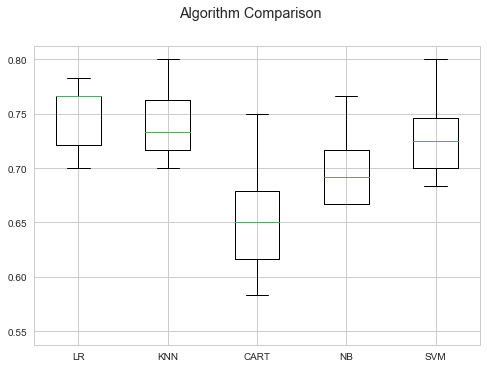

In [58]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
seed = 7
scoring = 'accuracy'
results = []
names = []
acc=list()
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    pd.DataFrame(acc.append(msg))
#Printing the accuracy achieved by each model    
print(acc)

#PLotting the model comparision as box plot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()




We can see that Logistic Regression gives us best accuracy, hence we will use it to make predictions on the test dataset. We have printed the confusion matrix and Classification report of the model.

In [59]:
# Make predictions on Test dataset using the best Model - Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

#Printing Accuracy, Confusion Matrix and Classification report
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.7375
[[239  39]
 [ 66  56]]
             precision    recall  f1-score   support

          0       0.78      0.86      0.82       278
          1       0.59      0.46      0.52       122

avg / total       0.72      0.74      0.73       400



Finally we will plot the ROC curve to see how our model has performed and find the Area Under the Curve

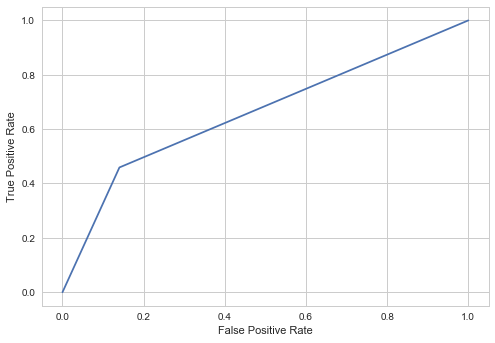

0.68654012079378779

In [61]:

# Plotting the ROC Curve
roc = roc_curve(y_test, predictions) 
sns.set_style("whitegrid") 
sns.plt.xlabel('False Positive Rate') 
sns.plt.ylabel('True Positive Rate') 
sns.plt.plot(roc[0], roc[1])
sns.plt.show()
roc_auc_score( predictions,y_test)